# Experiment Results
Our experiments were performed using the best parameters that maximized **accuracy**.  
We will visualize the following four experiments.

* Heterophily & Homophily Experiment
* Attribute Experiment
* Scalability Experiment
    * Edge Experiment 
    * Node & Edge Experiment       
* Class size Experiment

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../")

path_result = "./supplementary/"

methods = [
    "MLP",
    "GCN", "ChebNet", "MoNet", "GAT", "SGC",
    "JK-GCN", "JK-GAT", "JK-GraphSAGE",
    "GraphSAGE", "GraphSAINT-GAT", "GraphSAINT-GraphSAGE", "Shadow-GAT", "Shadow-GraphSAGE",
    "H2GCN", "FSGNN", "GPRGNN", "LINKX"
]


In [2]:
def plot_result(dataframe, methods, x_list, base_dataset, labels: list , metric="test_f１_macro", exp=""):
  plt.rcParams['text.usetex'] = True
  plt.style.use('default')
  sns.set()
  sns.set_style('whitegrid')
  sns.set_palette('Set1')
  fig = plt.figure(figsize=(5.5, 5))
  ax = fig.add_subplot(1, 1, 1)
  markers1 = [".", "d", "o", "v", "^", "<", ">", "1", "2", "3"]
  markers2 = ["4", "8", "p", "*", "h", "H", "x", "D"]
  markers = markers1 + markers2
  colors = plt.cm.get_cmap("tab20_r").colors

  for i, method in enumerate(methods):
    tmp = dataframe[dataframe["net"] == method]
    test_f1_macro_mean_list, test_f1_macro_std_list = [],[]
    for x in x_list:
      tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x.replace('random','rand')}")]
      if len(tmp_filtered)>0:
        test_f1_macro_mean = (tmp_filtered[f"{metric}_mean"] *
            tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
        test_f1_macro_std = (tmp_filtered[f"{metric}_std"] *
                    tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      else:
        test_f1_macro_mean = np.nan
        test_f1_macro_std = np.nan
      test_f1_macro_mean_list.append(test_f1_macro_mean)
      test_f1_macro_std_list.append(test_f1_macro_std)
    ax.errorbar(
        x_list,
        test_f1_macro_mean_list,
        yerr=test_f1_macro_std_list,
        marker=markers[i],
        label=method,
        capthick=1,
        capsize=8,
        lw=1,
        color=colors[i])
  # plt.yscale('log')
  ax.legend(ncol=3, bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.tick_params(labelsize=18)
  ax.set_xlabel(labels[0],fontsize=21)
  ax.set_ylabel(labels[1],fontsize=21)
  plt.tight_layout()
  plt.show()

# Class size Experiment

In [3]:
exp = "classsize"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_classsize = pd.read_csv(result_path)
print(df_classsize.shape)
for index, data in df_classsize.iterrows():
    df_classsize.loc[index, 'dataset'] = data.dataset.replace("flat", "balanced")
df_classsize.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]


(270, 66)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date
0,GenCAT_cora_0.4_0,GCN,55.096565,0.893314,2022-08-09 16:09:53.072
1,GenCAT_cora_0.4_1,GCN,46.927185,7.690178,2022-08-09 16:10:02.014
2,GenCAT_cora_0.4_2,GCN,43.390425,3.534886,2022-08-09 16:10:10.928
3,GenCAT_cora_0.6_0,GCN,69.808640,1.522788,2022-08-09 16:10:21.603
4,GenCAT_cora_0.6_1,GCN,71.753078,1.237421,2022-08-09 16:10:51.391


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


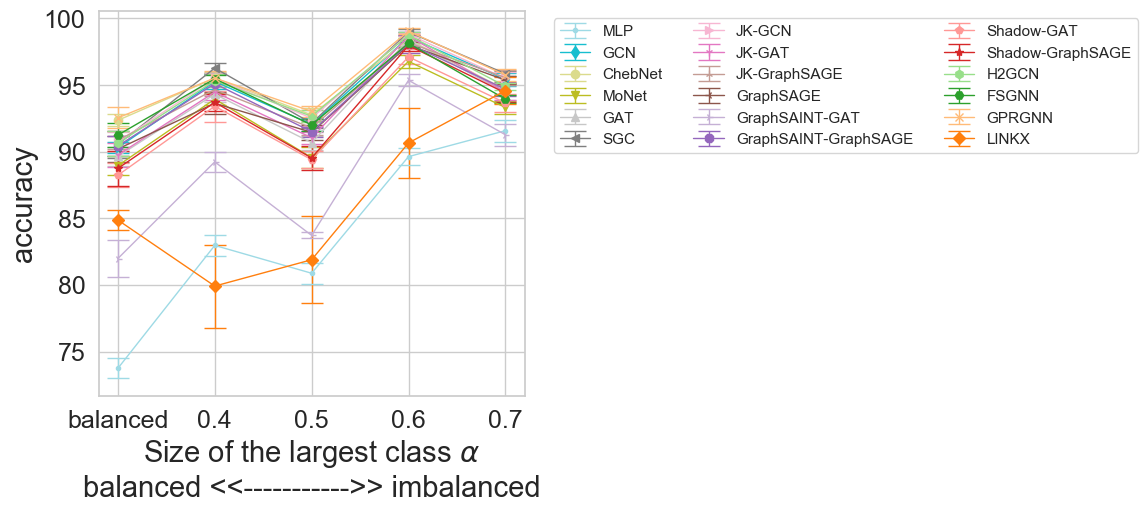

In [4]:
base_dataset = "cora"
metric = "test_acc"
xlabel = "Size of the largest class $α$\nbalanced <<----------->> imbalanced"
ylabel = 'accuracy'

x_list = ["balanced", 0.4, 0.5, 0.6, 0.7]
x_list = [str(x) for x in x_list]
plot_result(df_classsize, methods, x_list, base_dataset, labels=[xlabel, ylabel], metric=metric,exp=exp)


# Attribute Experiment

In [5]:
exp = "attribute"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_attribute = pd.read_csv(result_path)
print(df_attribute.shape)
df_attribute.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]


(270, 66)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date
0,GenCAT_cora_0_0,LINKX,51.461064,14.792296,2022-08-10 21:14:31.611
1,GenCAT_cora_0_1,LINKX,48.474240,5.305967,2022-08-10 21:15:03.361
2,GenCAT_cora_0_2,LINKX,51.285848,6.271110,2022-08-10 21:15:24.933
3,GenCAT_cora_16_0,LINKX,49.478623,2.117782,2022-08-10 21:18:03.216
4,GenCAT_cora_16_1,LINKX,54.092139,1.686027,2022-08-10 21:18:26.011


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


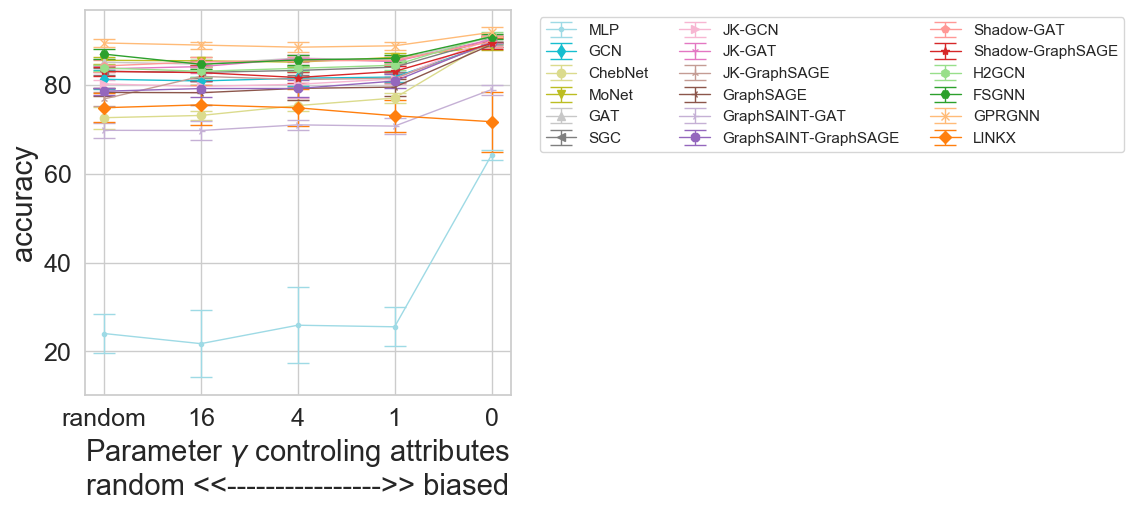

In [6]:
base_dataset = "cora"
metric = "test_acc"
xlabel = 'Parameter $γ$ controling attributes \nrandom <<---------------->> biased'
ylabel = 'accuracy'

x_list = ["random", 16, 4, 1, 0]
x_list = [str(x) for x in x_list]

plot_result(
    df_attribute,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric,exp=exp)


# Heterophily & Homophily Experiment

In [7]:
# read results of the attribute experiment
exp = "hetero_homo"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_hetero_homo = pd.read_csv(result_path)
print(df_hetero_homo.shape)
df_hetero_homo.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]

df_hetero_homo_copy = df_hetero_homo.copy()

# Replace the results for x=0 in the hetero-homo experiment with the
# results for x=0 in the attribute experiment since they are the same
# setting.
df_hetero_homo_copy = df_hetero_homo_copy.query(
    "not dataset.str.contains('GenCAT_cora_0_')", engine='python')
df_hetero_homo_adjusted = pd.concat([df_hetero_homo_copy,
                                     df_attribute.query("dataset.str.contains('GenCAT_cora_0_')", engine='python')])


(270, 66)


x_list ['8', '6', '4', '2', '0']


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


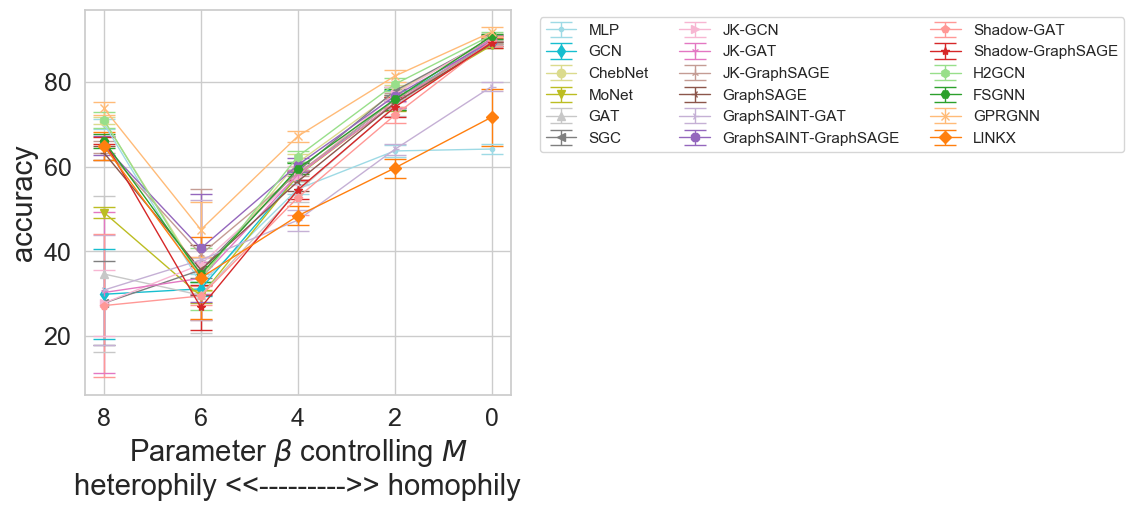

In [8]:
base_dataset = "cora"
xlabel = "Parameter $β$ controlling $M$\nheterophily <<--------->> homophily"
ylabel = 'accuracy'
metric = "test_acc"

x_list = [8, 6, 4, 2, 0]
x_list = [str(x) for x in x_list]
print("x_list", x_list)

plot_result(
    df_hetero_homo_adjusted,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric,exp=exp)


# Various Graph Sizes

## Node & Edge Experiment

In [9]:
exp = "scalability_node_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_scalability_node_edge = pd.read_csv(result_path)
print(df_scalability_node_edge.shape)
df_scalability_node_edge.head()[["dataset", "net", "test_f1_macro_mean",
                                 "test_f1_macro_std", "date", "total_time_mean"]]


(378, 66)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date,total_time_mean
0,GenCAT_cora_120000_200000_0,GCN,64.194868,0.207538,2022-08-09 20:02:19.200,13.629670
1,GenCAT_cora_120000_200000_1,GCN,64.384684,0.045005,2022-08-09 20:03:16.851,12.921105
2,GenCAT_cora_120000_200000_2,GCN,64.206737,0.012869,2022-08-09 20:04:11.294,15.195133
3,GenCAT_cora_15000_25000_0,GCN,63.179436,0.672327,2022-08-09 17:47:28.721,2.669727
4,GenCAT_cora_15000_25000_1,GCN,62.341729,0.335828,2022-08-09 17:47:52.921,2.706007


[('3000', '5000'), ('6000', '10000'), ('9000', '15000'), ('12000', '20000'), ('15000', '25000')]


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


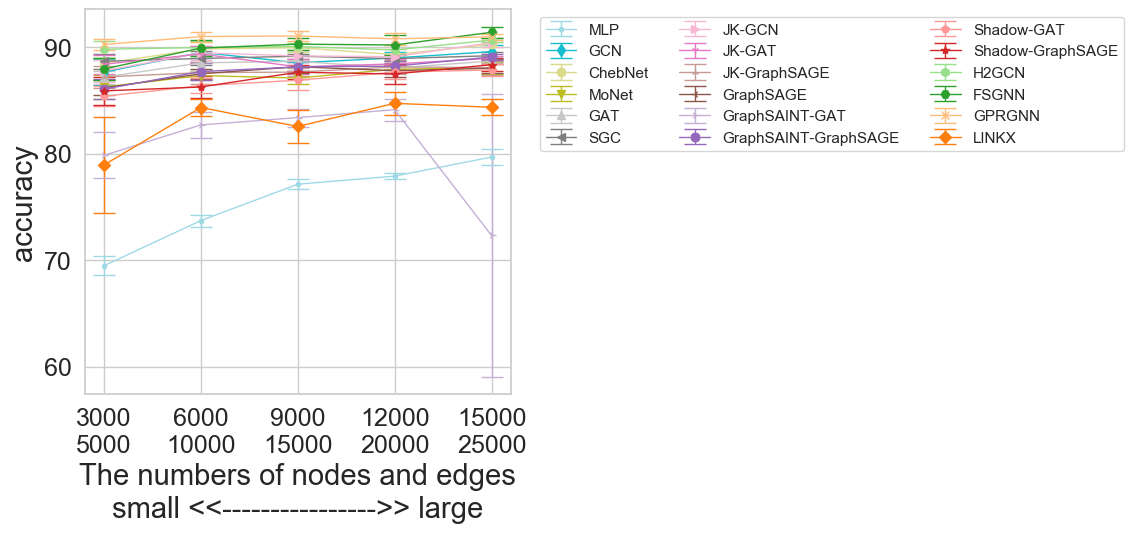

In [10]:
base_dataset = "cora"
metric = "test_acc"
ylabel = 'accuracy'
xlabel = "The numbers of nodes and edges\nsmall <<---------------->> large"
dataframe = df_scalability_node_edge

edge_list =[5000, 10000, 15000, 20000, 25000]
# edge_list =[5000, 10000, 15000, 20000, 25000, 100000, 200000]
edge_list = [str(x) for x in edge_list]

node_list = [3000, 6000, 9000, 12000, 15000]
# node_list = [3000, 6000, 9000, 12000, 15000, 60000, 120000]
node_list = [str(x) for x in node_list]
x_list = list(zip(node_list,edge_list))
print(x_list)

plt.rcParams['text.usetex'] = True
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
fig = plt.figure(figsize=(5.5, 5))
ax = fig.add_subplot(1, 1, 1)
markers1 = [".", "d", "o", "v", "^", "<", ">", "1", "2", "3"]
markers2 = ["4", "8", "p", "*", "h", "H", "x", "D"]
markers = markers1 + markers2
colors = plt.cm.get_cmap("tab20_r").colors

for i, method in enumerate(methods):
  tmp = dataframe[dataframe["net"] == method]
  test_f1_macro_mean_list, test_f1_macro_std_list = [],[]
  for x in x_list:
    tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x[0]}_{x[1]}")]
    if len(tmp_filtered)>0:
      test_f1_macro_mean = (tmp_filtered[f"{metric}_mean"] *
          tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      test_f1_macro_std = (tmp_filtered[f"{metric}_std"] *
                  tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      if test_f1_macro_mean==0:
        test_f1_macro_mean = np.nan
    else:
      test_f1_macro_mean = np.nan
      test_f1_macro_std = np.nan
    test_f1_macro_mean_list.append(test_f1_macro_mean)
    test_f1_macro_std_list.append(test_f1_macro_std)
  x_list_ = [f"{x_[0]}\n{x_[1]}" for x_ in x_list]
  ax.errorbar(
      x_list_,
      test_f1_macro_mean_list,
      yerr=test_f1_macro_std_list,
      marker=markers[i],
      label=method,
      capthick=1,
      capsize=8,
      lw=1,
      color=colors[i])
ax.legend(ncol=3, bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.tick_params(labelsize=18)
ax.set_xlabel(xlabel,fontsize=21)
ax.set_ylabel(ylabel,fontsize=21)
plt.tight_layout()
plt.show()


## Edge Experiment

In [11]:
exp = "scalability_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_scalability_edge = pd.read_csv(result_path)
print(df_scalability_edge.shape)
df_scalability_edge.head()[["dataset", "net", "test_f1_macro_mean",
                                 "test_f1_macro_std", "date", "total_time_mean"]]


(270, 66)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date,total_time_mean
0,GenCAT_cora_25000_0,GCN,67.665014,1.551127,2022-08-09 17:00:59.792,0.970425
1,GenCAT_cora_25000_1,GCN,62.677358,0.654279,2022-08-09 17:01:19.075,0.982790
2,GenCAT_cora_25000_2,GCN,63.494875,0.570832,2022-08-09 17:01:38.496,0.823872
3,GenCAT_cora_25000_0,MLP,50.681918,0.885303,2022-08-09 17:01:56.920,5.398540
4,GenCAT_cora_25000_1,MLP,47.210297,0.888185,2022-08-09 17:02:29.123,5.011079


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


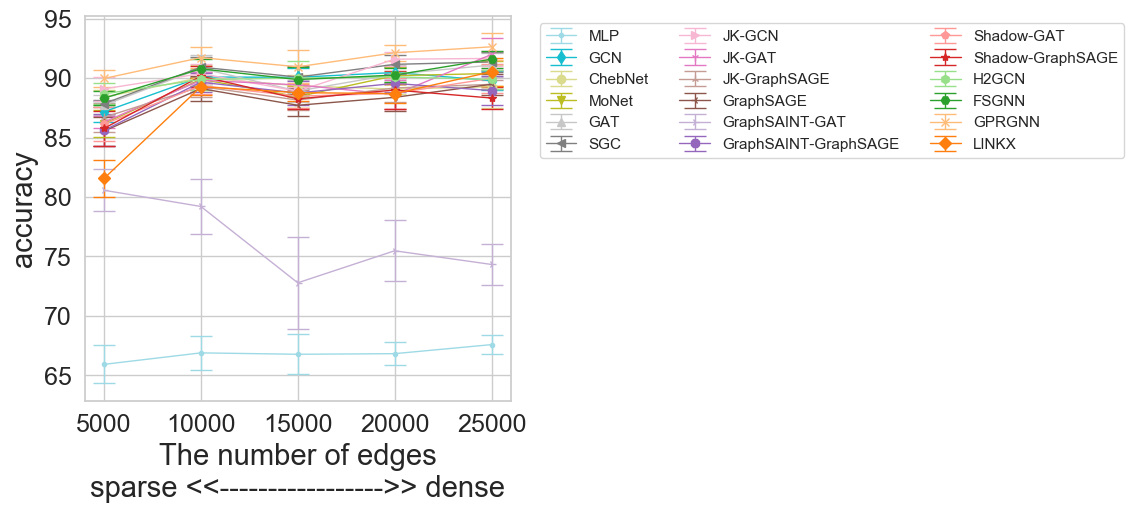

In [12]:
base_dataset = "cora"
metric = "test_acc"
ylabel = 'accuracy'
xlabel = "The number of edges\nsparse <<----------------->> dense"
x_list = [5000, 10000, 15000, 20000, 25000]
x_list = [str(x) for x in x_list]

plot_result(
    df_scalability_edge,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric,exp=exp)


(378, 66)
[('15000', '25000'), ('60000', '100000'), ('120000', '200000')]


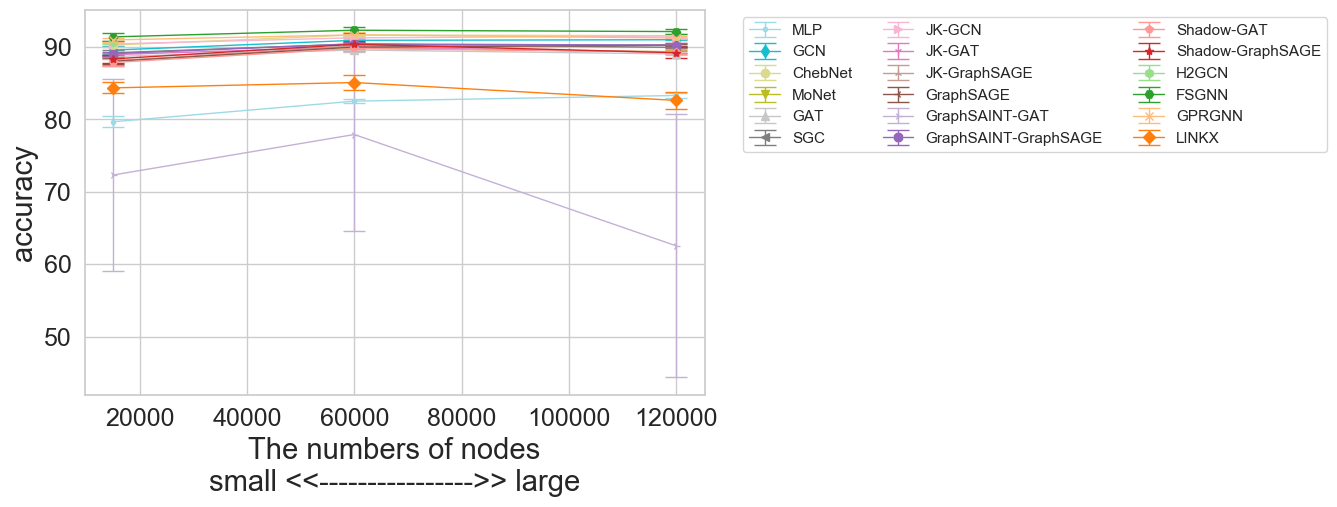

In [13]:
exp = "scalability_node_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}.csv"

df_scalability_node_edge = pd.read_csv(result_path)
print(df_scalability_node_edge.shape)
df_scalability_node_edge.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date", "total_time_mean"]]


base_dataset = "cora"
metric = "test_acc"
# metric = "epoch_time"
# ylabel = 'Time per epoch [sec]'
ylabel = 'accuracy'
xlabel = "The numbers of nodes\nsmall <<---------------->> large"
dataframe = df_scalability_node_edge

# edge_list =[5000, 10000, 15000, 20000, 25000] #, 100000, 200000]
edge_list =[25000, 100000, 200000]
edge_list = [str(x) for x in edge_list]

# node_list_ = [3000, 6000, 9000, 12000, 15000] #, 60000, 120000]
node_list_ = [15000, 60000, 120000]
node_list = [str(x) for x in node_list_]
x_list = list(zip(node_list,edge_list))
print(x_list)

plt.rcParams['text.usetex'] = True
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
markers1 = [".", "d", "o", "v", "^", "<", ">", "1", "2", "3"]
markers2 = ["4", "8", "p", "*", "h", "H", "x", "D"]
markers = markers1 + markers2
colors = plt.cm.get_cmap("tab20_r").colors

for i, method in enumerate(methods):
  tmp = dataframe[dataframe["net"] == method]
  test_f1_macro_mean_list, test_f1_macro_std_list = [],[]
  for x in x_list:
    tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x[0]}_{x[1]}")]
    if len(tmp_filtered)>0:
      test_f1_macro_mean = (tmp_filtered[f"{metric}_mean"] *
          tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      test_f1_macro_std = (tmp_filtered[f"{metric}_std"] *
                  tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      if test_f1_macro_mean==0:
        test_f1_macro_mean = np.nan
    else:
      test_f1_macro_mean = np.nan
      test_f1_macro_std = np.nan
    test_f1_macro_mean_list.append(test_f1_macro_mean)
    test_f1_macro_std_list.append(test_f1_macro_std)
  # x_list_ = [f"{x_[0]}\n{x_[1]}" for x_ in x_list]
  ax.errorbar(
      # x_list_,
      node_list_,
      test_f1_macro_mean_list,
      yerr=test_f1_macro_std_list,
      marker=markers[i],
      label=method,
      capthick=1,
      capsize=8,
      lw=1,
      color=colors[i])
# legend = ax.legend(ncol=9, bbox_to_anchor=(-.5, 1.2), loc='upper left')
ax.legend(ncol=3, bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.tick_params(labelsize=18)
ax.set_xlabel(xlabel,fontsize=21)
ax.set_ylabel(ylabel,fontsize=21)

# plt.yscale('log')
# plt.tight_layout()
plt.show()
